In [1]:
%run data_loader.ipynb
%run model.ipynb

In [2]:
model = model_ex2
model.to(device)

test_dataset = RadarDataset(data_transform, './data/images_test/')
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)
model.eval()

NewModel(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [3]:
total_AP = []
sunny_AP = []
fog_AP = []
rain_AP = []
night_AP = []

for i in range(15):
    model.load_state_dict(torch.load('./model/ex2_'+str(i+1)+'.pt'))

    # Total AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_total = torch.mean(AP)
    total_AP.append(mAP_total.item())
    print(f'Total AP : {mAP_total}'+'_'+str(i+1))
    
    # Sunny AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        if weather[0] == 'sunny':
            im = list(img.to(device) for img in im)
            for t in annot:
                labels += t['labels']
            with torch.no_grad():
                preds_adj = make_prediction(model, im, 0.5)
                preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
                preds_adj_all.append(preds_adj)
                annot_all.append(annot)
        else:
            pass
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_sunny = torch.mean(AP)
    sunny_AP.append(mAP_sunny.item())
    print(f'Sunny AP : {mAP_sunny}'+'_'+str(i+1))
    
    # Rain AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        if weather[0] == 'rain':
            im = list(img.to(device) for img in im)
            for t in annot:
                labels += t['labels']
            with torch.no_grad():
                preds_adj = make_prediction(model, im, 0.5)
                preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
                preds_adj_all.append(preds_adj)
                annot_all.append(annot)
        else:
            pass
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_rain = torch.mean(AP)
    rain_AP.append(mAP_rain.item())
    print(f'Rain AP : {mAP_rain}'+'_'+str(i+1))

    # Fog AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        if weather[0] == 'fog':
            im = list(img.to(device) for img in im)
            for t in annot:
                labels += t['labels']
            with torch.no_grad():
                preds_adj = make_prediction(model, im, 0.5)
                preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
                preds_adj_all.append(preds_adj)
                annot_all.append(annot)
        else:
            pass
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_fog = torch.mean(AP)
    fog_AP.append(mAP_fog.item())
    print(f'Fog AP : {mAP_fog}'+'_'+str(i+1))

    # Night AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        if weather[0] == 'night':
            im = list(img.to(device) for img in im)
            for t in annot:
                labels += t['labels']
            with torch.no_grad():
                preds_adj = make_prediction(model, im, 0.5)
                preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
                preds_adj_all.append(preds_adj)
                annot_all.append(annot)
        else:
            pass
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_night = torch.mean(AP)
    night_AP.append(mAP_night.item())
    print(f'Night AP : {mAP_night}'+'_'+str(i+1))

100%|███████████████████████████████████████| 1023/1023 [01:20<00:00, 12.73it/s]


Total AP : 0.7502507412167452_1


100%|███████████████████████████████████████| 1023/1023 [00:35<00:00, 28.78it/s]


Sunny AP : 0.927984431370465_1


100%|███████████████████████████████████████| 1023/1023 [00:37<00:00, 27.45it/s]


Rain AP : 0.7009486026831708_1


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 42.42it/s]


Fog AP : 0.7902850127108234_1


100%|███████████████████████████████████████| 1023/1023 [00:35<00:00, 28.68it/s]


Night AP : 0.8018316923125797_1


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.56it/s]


Total AP : 0.837056657780211_2


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.01it/s]


Sunny AP : 0.9328556662555254_2


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.85it/s]


Rain AP : 0.8053598228657433_2


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 41.88it/s]


Fog AP : 0.8385834751724062_2


100%|███████████████████████████████████████| 1023/1023 [00:35<00:00, 28.49it/s]


Night AP : 0.8873821040422083_2


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.48it/s]


Total AP : 0.8801098258507286_3


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.01it/s]


Sunny AP : 0.9618678332282471_3


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.76it/s]


Rain AP : 0.8501766272800308_3


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 41.87it/s]


Fog AP : 0.9353892881161023_3


100%|███████████████████████████████████████| 1023/1023 [00:35<00:00, 28.48it/s]


Night AP : 0.9120896948808919_3


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.53it/s]


Total AP : 0.8744137902142395_4


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.02it/s]


Sunny AP : 0.9575616242300917_4


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.86it/s]


Rain AP : 0.8447016184920502_4


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 41.74it/s]


Fog AP : 0.9172526116382258_4


100%|███████████████████████████████████████| 1023/1023 [00:35<00:00, 28.46it/s]


Night AP : 0.9076821360054854_4


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.49it/s]


Total AP : 0.9012823018804839_5


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 27.81it/s]


Sunny AP : 0.9572580177929559_5


100%|███████████████████████████████████████| 1023/1023 [00:37<00:00, 26.96it/s]


Rain AP : 0.8770508754178907_5


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 42.33it/s]


Fog AP : 0.9606445204943377_5


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.41it/s]


Night AP : 0.9249596049379973_5


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.51it/s]


Total AP : 0.8411145959232389_6


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.16it/s]


Sunny AP : 0.9388581286096205_6


100%|███████████████████████████████████████| 1023/1023 [00:37<00:00, 27.10it/s]


Rain AP : 0.813752084638093_6


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 42.05it/s]


Fog AP : 0.8251851343746459_6


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.21it/s]


Night AP : 0.8893047381295309_6


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.54it/s]


Total AP : 0.8913754087904815_7


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.17it/s]


Sunny AP : 0.9450941740825947_7


100%|███████████████████████████████████████| 1023/1023 [00:37<00:00, 27.12it/s]


Rain AP : 0.8730040002495159_7


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 42.24it/s]


Fog AP : 0.9162123206901374_7


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.20it/s]


Night AP : 0.9162792366691858_7


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.41it/s]


Total AP : 0.8841191721044144_8


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 27.72it/s]


Sunny AP : 0.9427937914403444_8


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.69it/s]


Rain AP : 0.8696551320644179_8


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 42.29it/s]


Fog AP : 0.8764766968896609_8


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 27.79it/s]


Night AP : 0.9051988414839811_8


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.36it/s]


Total AP : 0.9002929724177795_9


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 27.89it/s]


Sunny AP : 0.9667484288924619_9


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.91it/s]


Rain AP : 0.881935629180358_9


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 41.77it/s]


Fog AP : 0.9277060621555258_9


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.36it/s]


Night AP : 0.9082184997057219_9


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.41it/s]


Total AP : 0.9037723031542901_10


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 27.85it/s]


Sunny AP : 0.9644192996493004_10


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.78it/s]


Rain AP : 0.8845381845380231_10


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 41.32it/s]


Fog AP : 0.9137986575776758_10


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.17it/s]


Night AP : 0.9256570426131101_10


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.44it/s]


Total AP : 0.8982652731506908_11


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 27.74it/s]


Sunny AP : 0.9661802694241324_11


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.67it/s]


Rain AP : 0.8809467684332333_11


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 41.52it/s]


Fog AP : 0.8625497541516847_11


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.23it/s]


Night AP : 0.9262280143456372_11


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.39it/s]


Total AP : 0.9080196833113234_12


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 27.87it/s]


Sunny AP : 0.9568835315132347_12


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.73it/s]


Rain AP : 0.8942064370061837_12


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 42.13it/s]


Fog AP : 0.9066386651340999_12


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.20it/s]


Night AP : 0.9229766943218533_12


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.42it/s]


Total AP : 0.89930881738595_13


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.07it/s]


Sunny AP : 0.9597550211607455_13


100%|███████████████████████████████████████| 1023/1023 [00:37<00:00, 26.93it/s]


Rain AP : 0.884251349406799_13


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 42.37it/s]


Fog AP : 0.9012980187657669_13


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.41it/s]


Night AP : 0.9144213366127578_13


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.47it/s]


Total AP : 0.9086281788905683_14


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.05it/s]


Sunny AP : 0.9645499817167149_14


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.71it/s]


Rain AP : 0.8951923514453295_14


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 41.60it/s]


Fog AP : 0.9132762482004253_14


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.09it/s]


Night AP : 0.9161227942322387_14


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.42it/s]


Total AP : 0.9011206564391263_15


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 27.69it/s]


Sunny AP : 0.9554721477030093_15


100%|███████████████████████████████████████| 1023/1023 [00:38<00:00, 26.77it/s]


Rain AP : 0.8869653756936895_15


100%|███████████████████████████████████████| 1023/1023 [00:24<00:00, 41.79it/s]


Fog AP : 0.9023341565220946_15


100%|███████████████████████████████████████| 1023/1023 [00:36<00:00, 28.04it/s]


Night AP : 0.9138837077825377_15


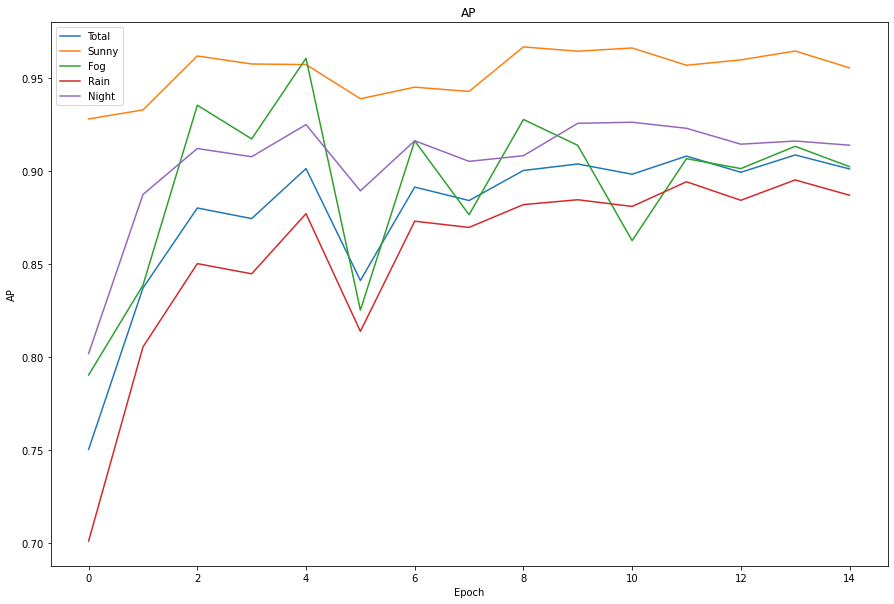

In [4]:
y1 = total_AP
y2 = sunny_AP
y3 = fog_AP
y4 = rain_AP
y5 = night_AP
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Total")
plt.plot(x, y2, label = "Sunny")
plt.plot(x, y3, label = "Fog")
plt.plot(x, y4, label = "Rain")
plt.plot(x, y5, label = "Night")
plt.xlabel('Epoch')
plt.ylabel('AP')
plt.title('AP')
plt.legend()
plt.show()

In [5]:
(m,i) = max((v,i) for i,v in enumerate(total_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(sunny_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(fog_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(rain_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(night_AP))
print (m,i)

0.9086281788905683 13
0.9667484288924619 8
0.9606445204943377 4
0.8951923514453295 13
0.9262280143456372 10


In [6]:
i = 13
print(y1[i])
print(y2[i]) #sunny
print(y3[i]) #fog
print(y4[i]) #rain
print(y5[i]) #night

0.9086281788905683
0.9645499817167149
0.9132762482004253
0.8951923514453295
0.9161227942322387
